In [1]:
import os
import cv2
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
image_size = 200

#path1 = r"s:\Tutorials(Learning)\PGA 23\images\Mask_NoMask"
path1 = r"K:\Mask_NoMask"


mask = ['Mask','No_Mask' ]

input_image = []
for i in mask:
    folders = os.path.join(path1, i)
    label = mask.index(i)                  # need to tell software which image is of which maskgory
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)    # using cv2, reading image storing variable
        image_array = cv2.resize(image_array, (image_size, image_size))    # resizing image to 200 * 200
        input_image.append([image_array, label])

In [42]:
len(input_image)

8838

In [43]:
input_image

[[array([[[245, 251, 250],
          [245, 251, 250],
          [245, 251, 250],
          ...,
          [254, 255, 253],
          [254, 255, 253],
          [254, 255, 253]],
  
         [[244, 251, 249],
          [244, 251, 249],
          [244, 251, 249],
          ...,
          [254, 255, 253],
          [254, 255, 253],
          [254, 255, 253]],
  
         [[244, 250, 249],
          [244, 250, 249],
          [244, 250, 249],
          ...,
          [254, 255, 253],
          [254, 255, 253],
          [254, 255, 253]],
  
         ...,
  
         [[ 50,  30,  29],
          [ 50,  30,  29],
          [ 49,  30,  29],
          ...,
          [ 90,  56,  49],
          [ 91,  57,  51],
          [ 86,  53,  46]],
  
         [[ 51,  31,  30],
          [ 50,  31,  30],
          [ 50,  30,  30],
          ...,
          [ 91,  57,  50],
          [ 92,  58,  52],
          [ 87,  53,  46]],
  
         [[ 51,  31,  30],
          [ 50,  31,  30],
          [ 50,  30,  29

In [ ]:
input_image = input_image[2500:5500]

In [24]:
np.random.shuffle(input_image)

X  = []
Y =  []

for X_values , labels in input_image:
    X.append(X_values)
    Y.append(labels)

X = np.array(X)
Y = np.array(Y)

In [25]:
len(input_image)

8838

In [26]:
X_train = X[:2550]
X_test = X[2550:]

Y_train = Y[:2550]
Y_test = Y[2550:]

X_train = X_train/255
X_test = X_test/255
X_train.shape

(2550, 200, 200, 3)

In [27]:
X_test.shape

(6288, 200, 200, 3)

In [28]:
model = Sequential()
model.add(Conv2D(filters = 16 , kernel_size =(5,5) , activation ='relu' ))
model.add(MaxPool2D(pool_size =(2,2)))
#model.add(Conv2D(filters = 16 , kernel_size =(5,5) , activation ='relu'  ,   ))
#model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten())
#model.add(Dense(128 , activation = 'relu' ))
#model.add(Dropout(0.4))
model.add(Dense(2 , activation= 'softmax'))

In [29]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [30]:
abc = model.fit(X_train, Y_train, epochs=23, validation_split=0.15)

Epoch 1/23
68/68 [==============================] - 27s 347ms/step - loss: 0.6712 - accuracy: 0.7480 - val_loss: 0.4001 - val_accuracy: 0.8512
Epoch 2/23
68/68 [==============================] - 16s 234ms/step - loss: 0.2603 - accuracy: 0.8948 - val_loss: 0.2995 - val_accuracy: 0.8695
Epoch 3/23
68/68 [==============================] - 16s 235ms/step - loss: 0.1626 - accuracy: 0.9437 - val_loss: 0.2886 - val_accuracy: 0.8903
Epoch 4/23
68/68 [==============================] - 17s 243ms/step - loss: 0.0949 - accuracy: 0.9695 - val_loss: 0.3242 - val_accuracy: 0.8825
Epoch 5/23
68/68 [==============================] - 16s 235ms/step - loss: 0.0580 - accuracy: 0.9838 - val_loss: 0.4280 - val_accuracy: 0.8538
Epoch 6/23
68/68 [==============================] - 17s 252ms/step - loss: 0.0387 - accuracy: 0.9945 - val_loss: 0.3701 - val_accuracy: 0.8877
Epoch 7/23
68/68 [==============================] - 16s 241ms/step - loss: 0.0221 - accuracy: 0.9958 - val_loss: 0.3905 - val_accuracy: 0.8773

In [31]:
pred = model.predict(X_test)
pred_classes = np.argmax(pred, 1)

In [32]:
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(pred_classes, Y_test)
tab

array([[3053,  387],
       [ 359, 2489]], dtype=int64)

In [33]:
Acc = tab.diagonal().sum()*100/tab.sum()
Acc

88.13613231552164

In [34]:
df1 = pd.DataFrame(abc.history)  # converting into Data frame
df1.head(50)

,loss,accuracy,val_loss,val_accuracy
0,0.671211,0.748039,0.400111,0.851175
1,0.260295,0.894785,0.299543,0.869452
2,0.162558,0.943701,0.288577,0.890339
3,0.094896,0.969543,0.324208,0.882507
4,0.057961,0.983849,0.427996,0.853786
5,0.038744,0.994462,0.370062,0.887728
6,0.022099,0.995847,0.390464,0.877285
7,0.013658,0.998616,0.399707,0.866841
8,0.007080,1.000000,0.464421,0.879896
9,0.004204,1.000000,0.436525,0.890339


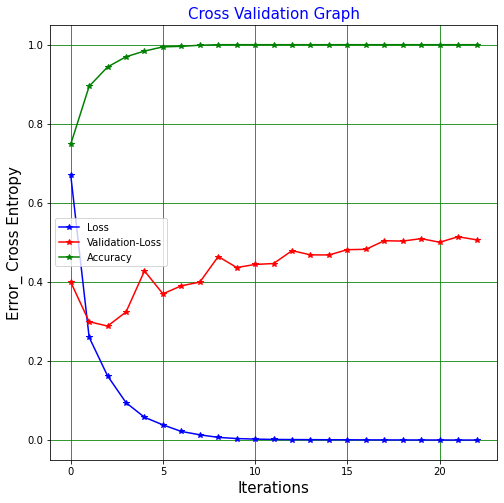

In [35]:
plt.figure(figsize= (8, 8))
plt.plot(df1.loss, color = "b" , marker ="*" , label = "Loss")
plt.plot(df1.val_loss , color = "r" , marker ="*"  , label ="Validation-Loss")
plt.plot(df1.accuracy , color = "g" , marker ="*"  , label ="Accuracy")
plt.grid(color = "green")
plt.xlabel("Iterations" , size = 15)
plt.ylabel("Error_ Cross Entropy" , size = 15)
plt.title("Cross Validation Graph" , color ="blue" , size = 15)
plt.legend()

## Save build model

In [36]:
#model.save('Mask_NoMask.h5')

## Load model for later use

In [38]:
#newName = load_model('MaskNoMask.h5')
#newName.predict(input data)